# PackagingCo Finance & Sales Forecasting Analysis

## Business Question
**How can PackagingCo drive ESG goals without compromising financial health?**

This notebook focuses on the **Finance & Sales Forecasting** module, analyzing:
- Sales and revenue trends across product lines and regions
- Profitability analysis and cost breakdowns
- Financial forecasting with scenario modeling
- Impact of sustainability initiatives on financial performance

## Key Objectives
1. **Analyze current financial performance** across different product lines and customer segments
2. **Develop forecasting models** for sales, revenue, and profitability
3. **Assess financial impact** of potential ESG initiatives
4. **Provide data-driven insights** for strategic financial planning

---


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready for financial analysis and forecasting 📊💰")


Libraries imported successfully!
Ready for financial analysis and forecasting 📊💰


## 1. Data Loading and Financial Metrics


In [2]:
# Load sales and financial data
sales_data = pd.read_csv('../data/raw/sample_sales_data.csv')
esg_data = pd.read_csv('../data/raw/sample_esg_data.csv')

# Convert date columns to datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])
esg_data['date'] = pd.to_datetime(esg_data['date'])

# Calculate additional financial metrics
sales_data['gross_profit'] = sales_data['revenue'] - sales_data['cost_of_goods']
sales_data['total_cost'] = sales_data['cost_of_goods'] + sales_data['operating_cost']
sales_data['net_profit'] = sales_data['revenue'] - sales_data['total_cost']
sales_data['gross_margin_pct'] = (sales_data['gross_profit'] / sales_data['revenue'] * 100).round(2)
sales_data['net_margin_pct'] = (sales_data['net_profit'] / sales_data['revenue'] * 100).round(2)

print("Sales Dataset Overview")
print("=" * 50)
print(f"Shape: {sales_data.shape}")
print(f"Date range: {sales_data['date'].min()} to {sales_data['date'].max()}")
print(f"Product lines: {sales_data['product_line'].unique()}")
print(f"Regions: {sales_data['region'].unique()}")
print(f"Customer segments: {sales_data['customer_segment'].unique()}")
print("\nFirst few rows with calculated metrics:")
sales_data.head()


Sales Dataset Overview
Shape: (36, 14)
Date range: 2023-01-01 00:00:00 to 2023-06-01 00:00:00
Product lines: ['Plastic Containers' 'Paper Packaging' 'Glass Bottles']
Regions: ['North America' 'Europe']
Customer segments: ['Retail' 'Wholesale']

First few rows with calculated metrics:


,date,product_line,region,customer_segment,units_sold,revenue,cost_of_goods,operating_cost,profit_margin,gross_profit,total_cost,net_profit,gross_margin_pct,net_margin_pct
0,2023-01-01,Plastic Containers,North America,Retail,15000,75000,45000,15000,15000,30000,60000,15000,40.0,20.0
1,2023-01-01,Paper Packaging,North America,Retail,12000,60000,36000,12000,12000,24000,48000,12000,40.0,20.0
2,2023-01-01,Glass Bottles,North America,Retail,8000,64000,48000,12800,3200,16000,60800,3200,25.0,5.0
3,2023-01-01,Plastic Containers,Europe,Wholesale,20000,100000,60000,20000,20000,40000,80000,20000,40.0,20.0
4,2023-01-01,Paper Packaging,Europe,Wholesale,18000,90000,54000,18000,18000,36000,72000,18000,40.0,20.0


## 2. Revenue and Sales Trends Analysis


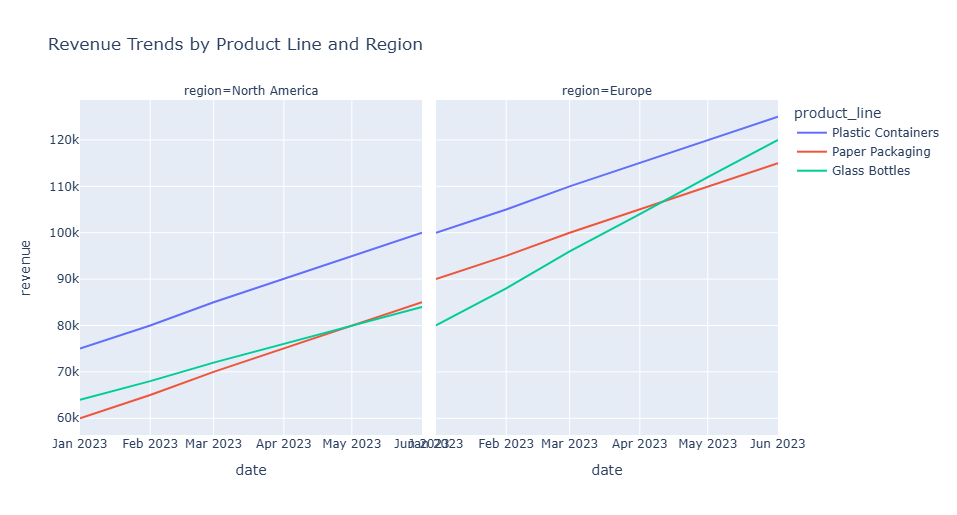

Total Revenue by Product Line:
Plastic Containers: $1,200,000
Paper Packaging: $1,050,000
Glass Bottles: $1,044,000


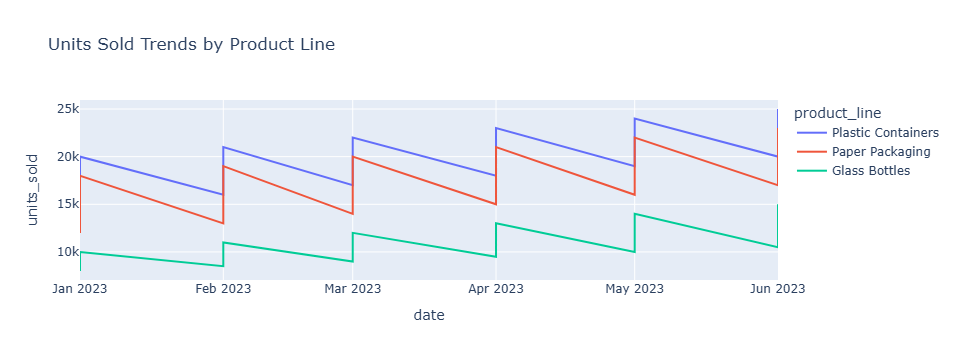

In [3]:
# Revenue trends over time by product line
fig = px.line(sales_data, x='date', y='revenue', color='product_line',
              facet_col='region', title='Revenue Trends by Product Line and Region')
fig.update_layout(height=500)
fig.show()

# Total revenue by product line
revenue_by_product = sales_data.groupby('product_line')['revenue'].sum().sort_values(ascending=False)
print("Total Revenue by Product Line:")
print("=" * 40)
for product, revenue in revenue_by_product.items():
    print(f"{product}: ${revenue:,.0f}")

# Units sold trends
fig = px.line(sales_data, x='date', y='units_sold', color='product_line',
              title='Units Sold Trends by Product Line')
fig.show()


## 3. Profitability Analysis


Profitability Summary by Product Line:
                    revenue  gross_profit  net_profit  gross_margin_pct  \
product_line                                                              
Glass Bottles       1044000        261000       52200              25.0   
Paper Packaging     1050000        420000      210000              40.0   
Plastic Containers  1200000        480000      240000              40.0   

                    net_margin_pct  
product_line                        
Glass Bottles                  5.0  
Paper Packaging               20.0  
Plastic Containers            20.0  


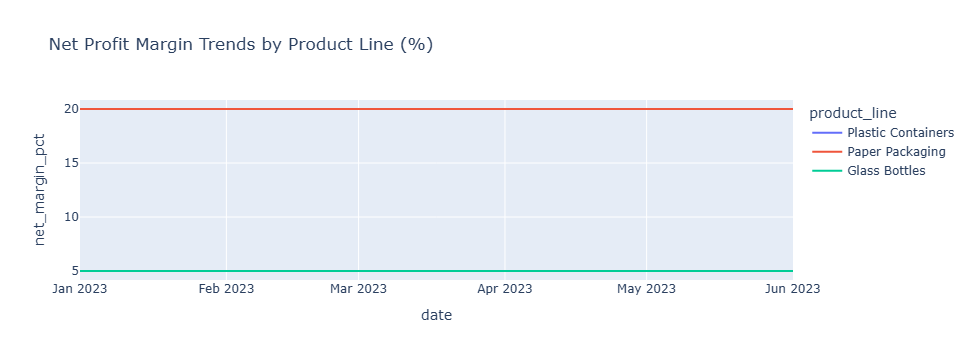


Average Cost Structure by Product Line:
                    cost_of_goods  operating_cost   revenue
product_line                                               
Glass Bottles             65250.0         17400.0   87000.0
Paper Packaging           52500.0         17500.0   87500.0
Plastic Containers        60000.0         20000.0  100000.0


In [4]:
# Profitability by product line
profitability_summary = sales_data.groupby('product_line').agg({
    'revenue': 'sum',
    'gross_profit': 'sum',
    'net_profit': 'sum',
    'gross_margin_pct': 'mean',
    'net_margin_pct': 'mean'
}).round(2)

print("Profitability Summary by Product Line:")
print("=" * 50)
print(profitability_summary)

# Margin trends over time
fig = px.line(sales_data, x='date', y='net_margin_pct', color='product_line',
              title='Net Profit Margin Trends by Product Line (%)')
fig.show()

# Cost breakdown analysis
cost_analysis = sales_data.groupby('product_line').agg({
    'cost_of_goods': 'mean',
    'operating_cost': 'mean',
    'revenue': 'mean'
}).round(2)

print("\nAverage Cost Structure by Product Line:")
print("=" * 50)
print(cost_analysis)


## 4. Simple Sales Forecasting Model

Let's create a basic forecasting model to project future sales and revenue trends.


In [5]:
# Prepare data for forecasting
monthly_sales = sales_data.groupby(['date', 'product_line']).agg({
    'revenue': 'sum',
    'units_sold': 'sum'
}).reset_index()

# Create time-based features for modeling
monthly_sales['month_number'] = range(len(monthly_sales))
monthly_sales = monthly_sales.sort_values(['product_line', 'date'])

# Simple linear regression forecast for each product line
forecast_results = {}

for product in monthly_sales['product_line'].unique():
    product_data = monthly_sales[monthly_sales['product_line'] == product].copy()
    
    # Prepare features (using month number as simple time trend)
    X = product_data[['month_number']].values
    y_revenue = product_data['revenue'].values
    y_units = product_data['units_sold'].values
    
    # Fit models
    revenue_model = LinearRegression()
    units_model = LinearRegression()
    
    revenue_model.fit(X, y_revenue)
    units_model.fit(X, y_units)
    
    # Generate forecasts for next 6 months
    future_months = np.arange(len(product_data), len(product_data) + 6).reshape(-1, 1)
    revenue_forecast = revenue_model.predict(future_months)
    units_forecast = units_model.predict(future_months)
    
    forecast_results[product] = {
        'revenue_forecast': revenue_forecast,
        'units_forecast': units_forecast,
        'revenue_trend': revenue_model.coef_[0],
        'units_trend': units_model.coef_[0]
    }

print("Forecasting Results - Monthly Growth Trends:")
print("=" * 50)
for product, results in forecast_results.items():
    print(f"{product}:")
    print(f"  Revenue trend: ${results['revenue_trend']:,.0f}/month")
    print(f"  Units trend: {results['units_trend']:,.0f} units/month")
    print(f"  6-month revenue forecast: ${results['revenue_forecast'][-1]:,.0f}")
    print()


Forecasting Results - Monthly Growth Trends:
Glass Bottles:
  Revenue trend: $4,000/month
  Units trend: 500 units/month
  6-month revenue forecast: $188,000

Paper Packaging:
  Revenue trend: $3,333/month
  Units trend: 667 units/month
  6-month revenue forecast: $183,333

Plastic Containers:
  Revenue trend: $3,333/month
  Units trend: 667 units/month
  6-month revenue forecast: $205,000



## 5. ESG Investment Impact Scenarios

Let's model how sustainability investments might affect our financial performance.


In [6]:
# Load ESG data for combined analysis
esg_data = pd.read_csv('../data/raw/sample_esg_data.csv')
esg_data['date'] = pd.to_datetime(esg_data['date'])

# Merge ESG and financial data
combined_data = pd.merge(sales_data, esg_data, on=['date', 'product_line'], how='inner')

# Current baseline metrics
baseline_metrics = combined_data.groupby('product_line').agg({
    'revenue': 'mean',
    'cost_of_goods': 'mean',
    'net_profit': 'mean',
    'net_margin_pct': 'mean',
    'recycled_material_pct': 'mean',
    'emissions_kg_co2': 'mean'
}).round(2)

print("BASELINE FINANCIAL & ESG METRICS:")
print("=" * 50)
print(baseline_metrics)

# Scenario modeling: Impact of increasing recycled materials
print("\n📊 SCENARIO ANALYSIS: Increasing Recycled Materials")
print("=" * 60)

for product in baseline_metrics.index:
    current_recycling = baseline_metrics.loc[product, 'recycled_material_pct']
    current_cost = baseline_metrics.loc[product, 'cost_of_goods']
    current_margin = baseline_metrics.loc[product, 'net_margin_pct']
    
    # Assume 5% cost increase for 10% recycling increase
    recycling_increase = 10  # percentage points
    cost_increase_pct = 5    # percentage
    
    new_recycling = current_recycling + recycling_increase
    new_cost = current_cost * (1 + cost_increase_pct/100)
    
    # Calculate impact on margin (simplified)
    revenue = baseline_metrics.loc[product, 'revenue']
    cost_impact = new_cost - current_cost
    margin_impact = (cost_impact / revenue) * 100
    new_margin = current_margin - margin_impact
    
    print(f"\n{product}:")
    print(f"  Current: {current_recycling:.1f}% recycled, {current_margin:.1f}% margin")
    print(f"  Scenario: {new_recycling:.1f}% recycled, {new_margin:.1f}% margin")
    print(f"  Impact: {margin_impact:.1f}pp margin reduction for sustainability gain")


BASELINE FINANCIAL & ESG METRICS:
                     revenue  cost_of_goods  net_profit  net_margin_pct  \
product_line                                                              
Glass Bottles        87000.0        65250.0      4350.0             5.0   
Paper Packaging      87500.0        52500.0     17500.0            20.0   
Plastic Containers  100000.0        60000.0     20000.0            20.0   

                    recycled_material_pct  emissions_kg_co2  
product_line                                                 
Glass Bottles                       23.67            3475.0  
Paper Packaging                     63.67            2025.0  
Plastic Containers                  33.67            2837.5  

📊 SCENARIO ANALYSIS: Increasing Recycled Materials

Glass Bottles:
  Current: 23.7% recycled, 5.0% margin
  Scenario: 33.7% recycled, 1.2% margin
  Impact: 3.8pp margin reduction for sustainability gain

Paper Packaging:
  Current: 63.7% recycled, 20.0% margin
  Scenario: 73.7% 

## 6. Strategic Financial Recommendations

Key insights and recommendations for balancing ESG goals with financial performance:


In [7]:
# Financial performance summary and recommendations
print("💰 FINANCIAL PERFORMANCE & ESG STRATEGY RECOMMENDATIONS")
print("=" * 70)

# Identify best performing products
best_margin_product = baseline_metrics['net_margin_pct'].idxmax()
highest_revenue_product = baseline_metrics['revenue'].idxmax()

print(f"1. FINANCIAL PERFORMANCE LEADERS:")
print(f"   • Highest margin: {best_margin_product} ({baseline_metrics.loc[best_margin_product, 'net_margin_pct']:.1f}%)")
print(f"   • Highest revenue: {highest_revenue_product} (${baseline_metrics.loc[highest_revenue_product, 'revenue']:,.0f})")

# Growth trajectory analysis
total_revenue_trend = sum([results['revenue_trend'] for results in forecast_results.values()])
print(f"\n2. GROWTH TRAJECTORY:")
print(f"   • Total monthly revenue growth: ${total_revenue_trend:,.0f}")
print(f"   • Projected annual growth: ${total_revenue_trend * 12:,.0f}")

# ESG investment capacity
avg_margin = baseline_metrics['net_margin_pct'].mean()
total_revenue = baseline_metrics['revenue'].sum()

print(f"\n3. ESG INVESTMENT CAPACITY:")
print(f"   • Average net margin: {avg_margin:.1f}%")
print(f"   • Total monthly revenue: ${total_revenue:,.0f}")
print(f"   • Estimated ESG investment budget (2% of revenue): ${total_revenue * 0.02:,.0f}/month")

print(f"\n4. STRATEGIC RECOMMENDATIONS:")
print(f"   • PRIORITIZE: {best_margin_product} for ESG investments (highest margin buffer)")
print(f"   • MONITOR: Cost increases should not exceed 2-3% to maintain profitability")
print(f"   • PHASE: Implement recycling increases gradually over 12-18 months")
print(f"   • MEASURE: Track margin impact monthly and adjust ESG pace accordingly")

print(f"\n5. RISK MITIGATION:")
print(f"   • Maintain minimum 15% net margin across all product lines")
print(f"   • Diversify ESG investments across multiple initiatives")
print(f"   • Consider premium pricing for eco-friendly products to offset costs")


💰 FINANCIAL PERFORMANCE & ESG STRATEGY RECOMMENDATIONS
1. FINANCIAL PERFORMANCE LEADERS:
   • Highest margin: Paper Packaging (20.0%)
   • Highest revenue: Plastic Containers ($100,000)

2. GROWTH TRAJECTORY:
   • Total monthly revenue growth: $10,667
   • Projected annual growth: $128,000

3. ESG INVESTMENT CAPACITY:
   • Average net margin: 15.0%
   • Total monthly revenue: $274,500
   • Estimated ESG investment budget (2% of revenue): $5,490/month

4. STRATEGIC RECOMMENDATIONS:
   • PRIORITIZE: Paper Packaging for ESG investments (highest margin buffer)
   • MONITOR: Cost increases should not exceed 2-3% to maintain profitability
   • PHASE: Implement recycling increases gradually over 12-18 months
   • MEASURE: Track margin impact monthly and adjust ESG pace accordingly

5. RISK MITIGATION:
   • Maintain minimum 15% net margin across all product lines
   • Diversify ESG investments across multiple initiatives
   • Consider premium pricing for eco-friendly products to offset costs
